In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## Load, Explore, and Preprocess Data

In [2]:
df = pd.read_csv('data/student_lifestyle_dataset.csv')
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [3]:
df.isna().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [6]:
df.nunique()

Student_ID                         2000
Study_Hours_Per_Day                  51
Extracurricular_Hours_Per_Day        41
Sleep_Hours_Per_Day                  51
Social_Hours_Per_Day                 61
Physical_Activity_Hours_Per_Day     118
GPA                                 158
Stress_Level                          3
dtype: int64

In [7]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


<Axes: xlabel='GPA', ylabel='Count'>

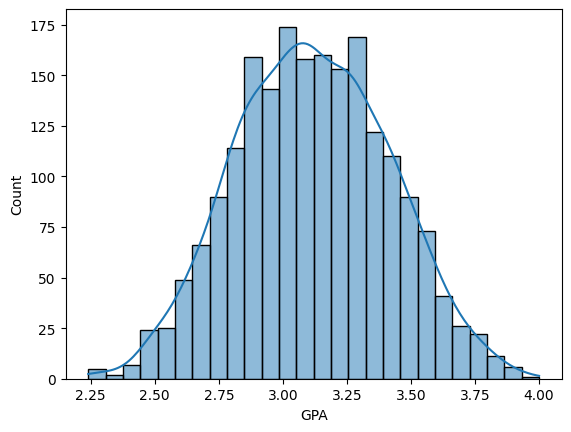

In [8]:
sns.histplot(df['GPA'], kde=True)

### Preprocess data

In [9]:
X = df.drop(columns=['GPA', 'Student_ID'], axis=1)
X.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,Moderate
1,5.3,3.5,8.0,4.2,3.0,Low
2,5.1,3.9,9.2,1.2,4.6,Low
3,6.5,2.1,7.2,1.7,6.5,Moderate
4,8.1,0.6,6.5,2.2,6.6,High


In [10]:
y = df['GPA']
y

0       2.99
1       2.75
2       2.67
3       2.88
4       3.51
        ... 
1995    3.32
1996    2.65
1997    3.14
1998    3.04
1999    3.58
Name: GPA, Length: 2000, dtype: float64

In [11]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder()),
        ("scaler", StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features)
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(2000, 8)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor()
}

results = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae,mse,r2 = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    
    print('Model performance')
    print(f"- Mean Absolute Error: {mae:.4f}")
    print(f"- Mean Squred Error: {mse:.4f}")
    print(f"- R2 Score: {r2:.4f}")

    results[list(models.keys())[i]] = {"MAE": mae,"MSE": mse, "R2": r2}
    
    print('='*35)
    print('\n')

Linear Regression
Model performance
- Mean Absolute Error: 0.1644
- Mean Squred Error: 0.0423
- R2 Score: 0.5474


Ridge Regression
Model performance
- Mean Absolute Error: 0.1644
- Mean Squred Error: 0.0423
- R2 Score: 0.5474


Lasso Regression
Model performance
- Mean Absolute Error: 0.1874
- Mean Squred Error: 0.0535
- R2 Score: 0.4270


Random Forest
Model performance
- Mean Absolute Error: 0.1825
- Mean Squred Error: 0.0515
- R2 Score: 0.4485




In [23]:
pd.DataFrame(results)

,Linear Regression,Ridge Regression,Lasso Regression,Random Forest
MAE,0.164406,0.164363,0.187414,0.182476
MSE,0.042257,0.042260,0.053497,0.051486
R2,0.547390,0.547362,0.427003,0.448544
